# CV and Transfer Learning

Q1. Import tensorflow (2.x Mandatory)

*   Import other required libraries

In [4]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

2.1.0


Q2. Load CIFAR10 dataset from keras and split into train and test
*    Identify shape of x_train and y_train

In [0]:
from sklearn.model_selection import train_test_split
(X_train, y_train),(X_test, y_test) = tf.keras.datasets.cifar10.load_data()

Q3.

*   Transform x_train and x_test on scale of 0-1
*   Transform y_train and y_test to categories



In [6]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [0]:
#Convert labels to one hot encoding
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [10]:
y_test_cat.dtype

dtype('float32')

In [11]:
X_test_norm.dtype

dtype('float32')

In [0]:
X_train_norm = X_train/np.float32(255)
X_test_norm = X_test/np.float32(255)

In [13]:
X_test_norm.shape

(10000, 32, 32, 3)

Q4. Import necessary packages required for Model building
*   Conv2D, Dense, Flatten, Dropout, MaxPooling2D etc.

In [0]:
#Importing required keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.backend import clear_session
from tensorflow.keras.layers import Reshape, Dense, Dropout, BatchNormalization, Activation, Conv2D, MaxPool2D, Flatten

Q5. Prepare a CNN
 
*   Which will include above layers
*   Freely create your own Architecture and Arguments
*   Print Model Summary

In [0]:
#Clear any previous model from memory
tf.keras.backend.clear_session()

#Initialize model
model = Sequential()

#normalize data
model.add(BatchNormalization(input_shape=(32,32,3,)))

#Add Conv Layer
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))

#normalize data
model.add(BatchNormalization(input_shape=(32,32,3,)))

#Add Conv Layer
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))

#normalize data
model.add(BatchNormalization(input_shape=(32,32,3,)))

#Add Max Pool layer
model.add(MaxPool2D(pool_size=(2,2)))

#Add Dense Layers after flattening the data
model.add(Flatten())
model.add(Dense(128, activation='relu'))

#Add Dropout
model.add(Dropout(0.25))

#Add Output Layer
model.add(Dense(10, activation='softmax'))

Q6. Train the CNN

*   Compile the model
*   Fit the model (10 epochs, 32 batch size)
*   Evaluate Model Performance

In [0]:
#Specify Loass and Optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
#Time taken on CPU
model.fit(X_train_norm,y_train_cat, validation_data=(X_test_norm,y_test_cat), epochs=10, batch_size=32)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 220s 4ms/sample - loss: 1.6512 - accuracy: 0.4206 - val_loss: 1.2073 - val_accuracy: 0.5860
Epoch 2/10
50000/50000 [==============================] - 218s 4ms/sample - loss: 1.2468 - accuracy: 0.5632 - val_loss: 1.0409 - val_accuracy: 0.6433
Epoch 3/10
50000/50000 [==============================] - 217s 4ms/sample - loss: 1.1073 - accuracy: 0.6116 - val_loss: 1.0079 - val_accuracy: 0.6597
Epoch 4/10
50000/50000 [==============================] - 218s 4ms/sample - loss: 1.0021 - accuracy: 0.6495 - val_loss: 0.9749 - val_accuracy: 0.6700
Epoch 5/10
50000/50000 [==============================] - 217s 4ms/sample - loss: 0.9120 - accuracy: 0.6811 - val_loss: 0.9796 - val_accuracy: 0.6757
Epoch 6/10
50000/50000 [==============================] - 217s 4ms/sample - loss: 0.8277 - accuracy: 0.7120 - val_loss: 0.9645 - val_accuracy: 0.6808
Epoch 7/10
50000/50000 [==========================

In [21]:
model.evaluate(X_test_norm, y_test_cat)

10000/10000 [==============================] - 10s 951us/sample - loss: 1.0330 - accuracy: 0.6949


[1.0329868048667907, 0.6949]

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 32, 32, 3)         12        
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

Q7. Import packages required for VGG16

*   `tf.keras.application`
> VGG16, preprocess_input, decode_predictions
*   `tf.keras.preprocessing`
> load_img, img_to_array



In [0]:
#Importing required keras modules
from tensorflow.keras.applications import vgg16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array

Q8. Load image


*   Mount Google Drive
*   Navigate to image location (use `os`)
*   Load image and assign a variable (use `load_img`)

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Read the dataset
!wget '/content/drive/My Drive/Colab Notebooks/Python/Lab/Lab 8/images.zip' --quiet

In [63]:
os.chdir('/content/drive/My Drive/Colab Notebooks/Python/Lab/Lab 8/')
os.getcwd()
!ls

images	images.zip  R8_Internal_Lab_ACV_NLP_Question.ipynb  tweets.csv


In [64]:
#Check if file is downloaded
!ls -l

total 1672
drwx------ 2 root root    4096 Feb  2 10:14 images
-rw------- 1 root root  415874 Feb  2 08:24 images.zip
-rw------- 1 root root   30370 Feb  2 10:32 R8_Internal_Lab_ACV_NLP_Question.ipynb
-rw------- 1 root root 1260464 Feb  2 08:24 tweets.csv


In [79]:
#Unzip the data
!unzip images.zip

Archive:  images.zip
replace images/49436743043_2441587ab9_c.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: images/49436743043_2441587ab9_c.jpg  
  inflating: images/49438170746_8378201627_c.jpg  
  inflating: images/49441887332_107afa786d_c.jpg  
  inflating: images/4994221690_d070e8a355_c.jpg  


Q9. Preprocess the image


*   Convert image into array (use `img_to_array`)
*   Check shape of image
*   Reshape image into 4 dimensional format (use `reshape`)
*   Prepare the image for VGG16 (Use `preprocess_input()`)

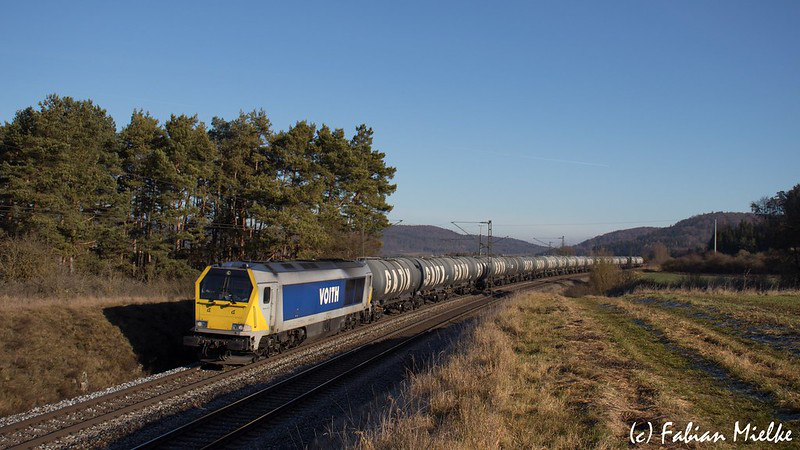

In [101]:
image_file = 'images/49438170746_8378201627_c.jpg'
image = tf.keras.preprocessing.image.load_img(image_file)
image

In [102]:
image.size

(800, 450)

In [103]:
#Prepare Input 
#VGG takes 224x224 image
model_input = image.resize((224,224))
model_input = tf.keras.preprocessing.image.img_to_array(model_input)

#Image array should be normalized in same way as was done for VGG training
model_input = tf.keras.applications.vgg16.preprocess_input(model_input)

#Add a dimension to input data to make it a 4D input as required by model
model_input = np.expand_dims(model_input, axis=0)
model_input.shape

(1, 224, 224, 3)

Q10. Predict the Class of image


*   Use `predict()` to calculate probabilities (Assign a variable)
*   Convert the probabilities to class labels (Use `decode_predictions`)(Assign a variable)
*   Print the classification results


> Use 
>*  label = label[0][0]
>*   print('%s (%.2f%%)' % (label[1], label[2]*100))
>*(where label is variable assigned for `decode_predictions` )



In [0]:
#Load VGG Model
vgg = tf.keras.applications.vgg16.VGG16(include_top=True, #Should we include classification Layers
                                        weights='imagenet', #Load imagenet weights, 'None' will load random weights
                                        input_shape=(224,224,3)) #Input image size

In [105]:
#Predict
prediction = vgg.predict(model_input)
prediction

array([[1.84210506e-07, 2.14255316e-08, 4.39965397e-09, 1.39976997e-09,
        2.28495400e-09, 3.91858386e-08, 3.18170046e-09, 1.32325127e-07,
        1.27614598e-07, 1.87486432e-06, 6.50322534e-08, 1.03821385e-07,
        2.60457771e-08, 6.13299633e-08, 3.87719936e-08, 1.71618936e-07,
        8.74427997e-08, 5.42569438e-08, 2.39609619e-07, 4.61648497e-08,
        1.31826468e-07, 5.48596653e-08, 5.96205496e-07, 7.58232090e-07,
        1.94825759e-07, 3.09427122e-07, 3.25083761e-07, 2.62637940e-07,
        8.54798543e-08, 1.17391483e-08, 6.79557814e-08, 9.05532431e-08,
        6.17997884e-08, 3.28283782e-08, 1.29042789e-07, 2.34549091e-07,
        1.69325688e-07, 7.37127053e-08, 1.00637415e-07, 2.57732040e-07,
        2.24938972e-07, 1.10787440e-07, 5.92857418e-07, 3.57461722e-08,
        1.12084126e-06, 1.14460806e-06, 3.29550915e-07, 3.14470185e-07,
        1.45842350e-07, 1.29463373e-07, 7.40857971e-08, 5.58170790e-08,
        6.15552693e-08, 1.28055547e-07, 5.28363955e-07, 1.310708

In [0]:
prediction_array = decode_predictions(prediction)

In [107]:
prediction_array

[[('n03393912', 'freight_car', 0.34337297),
  ('n04467665', 'trailer_truck', 0.23375975),
  ('n03895866', 'passenger_car', 0.096593596),
  ('n03272562', 'electric_locomotive', 0.07173587),
  ('n03160309', 'dam', 0.07000063)]]

#NLP

## Question 1

Read file 'tweets.csv'

In [216]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Python/Lab/Lab 8/tweets.csv", encoding='mac_roman')
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


**Drop null values**

*   Drop all the rows with null values




In [0]:
df.dropna(inplace=True)

In [218]:
df.isnull().sum()

tweet_text                                            0
emotion_in_tweet_is_directed_at                       0
is_there_an_emotion_directed_at_a_brand_or_product    0
dtype: int64

**Print the dataframe**
*   print initial 5 rows of the data


In [219]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


##Question 2

**Preprocess data**


*   convert all text to lowercase - use .lower()
*   select only numbers, alphabets, and #+_ from text - use re.sub()
*   strip all the text - use .strip() [To remove extra spaces]

In [0]:
import re

In [0]:
df = df.applymap(lambda s: s.lower())
df = df.applymap(lambda s: re.sub('[^0-9a-z #+_]','',s))

## Question 3

**Preprocess data**


*   in column "is_there_an_emotion_directed_at_a_brand_or_product"
select only those rows where value equal to "positive emotion" or "negative emotion"
*   find the value counts of "positive emotion" and "negative emotion"





In [222]:
df[(df['is_there_an_emotion_directed_at_a_brand_or_product']=="positive emotion") | (df['is_there_an_emotion_directed_at_a_brand_or_product']=="negative emotion")].sample(10)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
7788,google earth engine are providing tech to indi...,other google product or service,positive emotion
5540,rt mention backupify announces cloudsight sear...,other google product or service,positive emotion
476,before it even begins apple wins sxsw link #ap...,apple,positive emotion
7016,tip for conference goers everywhere bring ipad...,ipad,positive emotion
4865,excited to meet the mention at #sxsw so i can ...,android,negative emotion
6265,rt mention lonely planet releases free austin ...,ipad or iphone app,negative emotion
6529,rt mention rt mention forward to delicious tmo...,iphone,negative emotion
8739,geeking out rt mention if you havent waited in...,apple,positive emotion
3331,mention google circles will be lame #sxsw lt3,other google product or service,negative emotion
6743,rt mention the ipad 2 goes on sale next friday...,ipad,positive emotion


In [223]:
df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

positive emotion                      2672
negative emotion                       519
no emotion toward brand or product      91
i cant tell                              9
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

##Question 4

### Encode labels
- in column "is_there_an_emotion_directed_at_a_brand_or_product"
    - change "positive emotion" to 1
    - change "negative emotion" to 0
- use map function to replace values

In [0]:
df['Label'] = df.is_there_an_emotion_directed_at_a_brand_or_product.map({'positive emotion':1,'negative emotion':0 })

## Question 5

### Get feature and label
- get column "tweet_text" as feature
- get column "is_there_an_emotion_directed_at_a_brand_or_product" as label

In [0]:
X = df["tweet_text"]
y = df["is_there_an_emotion_directed_at_a_brand_or_product"]

### Create train and test data
- use train_test_split to get train and test set
- set a random_state
- test_size: 0.25

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

## Question 6

### Vectorize data
- create document-term matrix
- use CountVectorizer()
    - ngram_range: (1, 2)
    - stop_words: 'english'
    - min_df: 2   
- do fit_transform on X_train
- do transform on X_test

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(ngram_range=(1, 2), min_df=2, stop_words='english')
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

## Question 7

### Select classifier logistic regression
- use logistic regression for predicting sentiment of the given tweet
- initialize classifier

In [0]:
from sklearn.linear_model import LogisticRegression
# use Naive Bayes to predict the star rating
lr =LogisticRegression()

### Fit the classifer
- fit logistic regression classifier

In [0]:
lr = lr.fit(X_train_dtm, y_train)

## Question 8

### Select classifier naive bayes
- use naive bayes for predicting sentiment of the given tweet
- initialize classifier
- use MultinomialNB

In [0]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

### Fit the classifer
- fit naive bayes classifier

In [0]:
# train the model using X_train_dtm
nb = nb.fit(X_train_dtm, y_train)

## Question 9

### Make predictions on logistic regression
- use your trained logistic regression model to make predictions on X_test

In [0]:
y_pred_class_lr = lr.predict(X_test_dtm)

### Make predictions on naive bayes
- use your trained naive bayes model to make predictions on X_test
- use a different variable name to store predictions so that they are kept separately

In [0]:
y_pred_class_nb = nb.predict(X_test_dtm)

## Question 10

### Calculate accuracy of logistic regression
- check accuracy of logistic regression classifer
- use sklearn.metrics.accuracy_score

In [234]:
from sklearn import metrics
print (metrics.accuracy_score(y_test, y_pred_class_lr))

0.8432563791008505


### Calculate accuracy of naive bayes
- check accuracy of naive bayes classifer
- use sklearn.metrics.accuracy_score

In [235]:
print (metrics.accuracy_score(y_test, y_pred_class_nb))

0.8383961117861483
